# 🍷 와인 데이터 분석 프로젝트: 분류와 회귀

이번 통합 실습 프로젝트에서는 **와인(Wine) 데이터셋** 하나를 가지고 지도 학습의 두 가지 핵심 과제인 **분류(Classification)**와 **회귀(Regression)**를 모두 경험합니다. '와인의 화학 성분'이라는 동일한 특성(Feature) 데이터를 사용하여, 한 번은 '와인의 품종'을 맞추는 분류 모델을, 다른 한 번은 '알코올 도수'를 예측하는 회귀 모델을 만들어 봅니다.

이 과정을 통해 두 과제의 목표와 모델링 방식, 그리고 성능 평가지표가 어떻게 다른지 명확하게 비교하며 이해할 수 있습니다.

**🎯 프로젝트 목표:**

1.  **데이터 탐색(EDA)**: 실제 데이터를 시각화하여 변수 간의 관계를 탐색하고, 분석 방향에 대한 인사이트를 얻습니다.
2.  **분류 모델링**: 와인 품종을 예측하는 분류 모델(로지스틱 회귀, 랜덤 포레스트)을 만들고, **정확도**와 **혼동 행렬**로 성능을 평가합니다.
3.  **회귀 모델링**: 알코올 도수를 예측하는 회귀 모델(선형 회귀, 랜덤 포레스트)을 만들고, **MSE**, **RMSE**로 성능을 평가합니다.
4.  **결과 해석**: '특성 중요도'를 통해 두 문제에서 어떤 변수가 예측에 중요하게 사용되었는지 비교 분석하고, 최종 결론을 도출합니다.


## 사전 준비: 라이브러리 및 데이터 로드

scikit-learn에 내장된 와인(Wine) 데이터셋을 사용합니다. 이 데이터는 별도의 정제 과정 없이 바로 사용할 수 있을 정도로 깨끗합니다.


In [5]:
# 필요 라이브러리 설치
!pip install scikit-learn seaborn

# 코랩에서 한글 폰트 사용을 위한 설정 (필요 시 주석 해제 후 실행)
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# 위 코드 실행 후 상단 메뉴에서 [런타임] > [런타임 다시 시작]을 눌러주세요.

In [6]:
# 런타임 다시 시작 후, 이 셀을 실행하여 라이브러리와 폰트를 로드합니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score

# 한글 폰트 설정 (Mac 사용자는 'AppleGothic', Windows 사용자는 'Malgun Gothic' 등)
# plt.rc('font', family='NanumGothic')
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 1. scikit-learn에서 와인 데이터셋 로드
wine = load_wine()

# 2. 데이터프레임으로 변환
data = pd.DataFrame(data=wine.data, columns=wine.feature_names)
data['target'] = wine.target

print("와인 데이터 준비 완료!")
print("데이터 크기:", data.shape)
data.head()

와인 데이터 준비 완료!
데이터 크기: (178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Part 1: 데이터 탐험 및 문제 정의

> **🎯 목표:** 데이터를 본격적으로 분석하기 전에, 데이터의 기본적인 구조와 변수 간의 관계를 시각적으로 탐색하고, 우리가 해결할 두 가지 문제를 명확히 정의합니다.


### 💡 핵심 개념:

**탐색적 데이터 분석(EDA, Exploratory Data Analysis)**은 데이터의 구조, 패턴, 이상치, 변수 간의 관계 등을 파악하기 위해 시각화와 기초 통계량을 활용하는 과정입니다. EDA를 통해 데이터에 대한 깊은 이해를 얻고, 이를 바탕으로 효과적인 분석 전략을 수립할 수 있습니다.


### 📌 수행 과제:

1.  `.info()`와 `.describe()`를 사용해 데이터의 기본 정보(데이터 타입, 결측치 유무)와 기술 통계량(평균, 표준편차 등)을 확인합니다.
2.  `seaborn`의 `pairplot`을 사용해 몇 가지 주요 변수들(`alcohol`, `flavanoids`, `proline`, `color_intensity`) 간의 관계를 시각적으로 탐색합니다.
3.  EDA 결과를 바탕으로, 우리가 이 데이터로 해결할 **분류 문제**와 **회귀 문제**를 각각 명확하게 정의합니다.


===== 데이터 정보 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null   

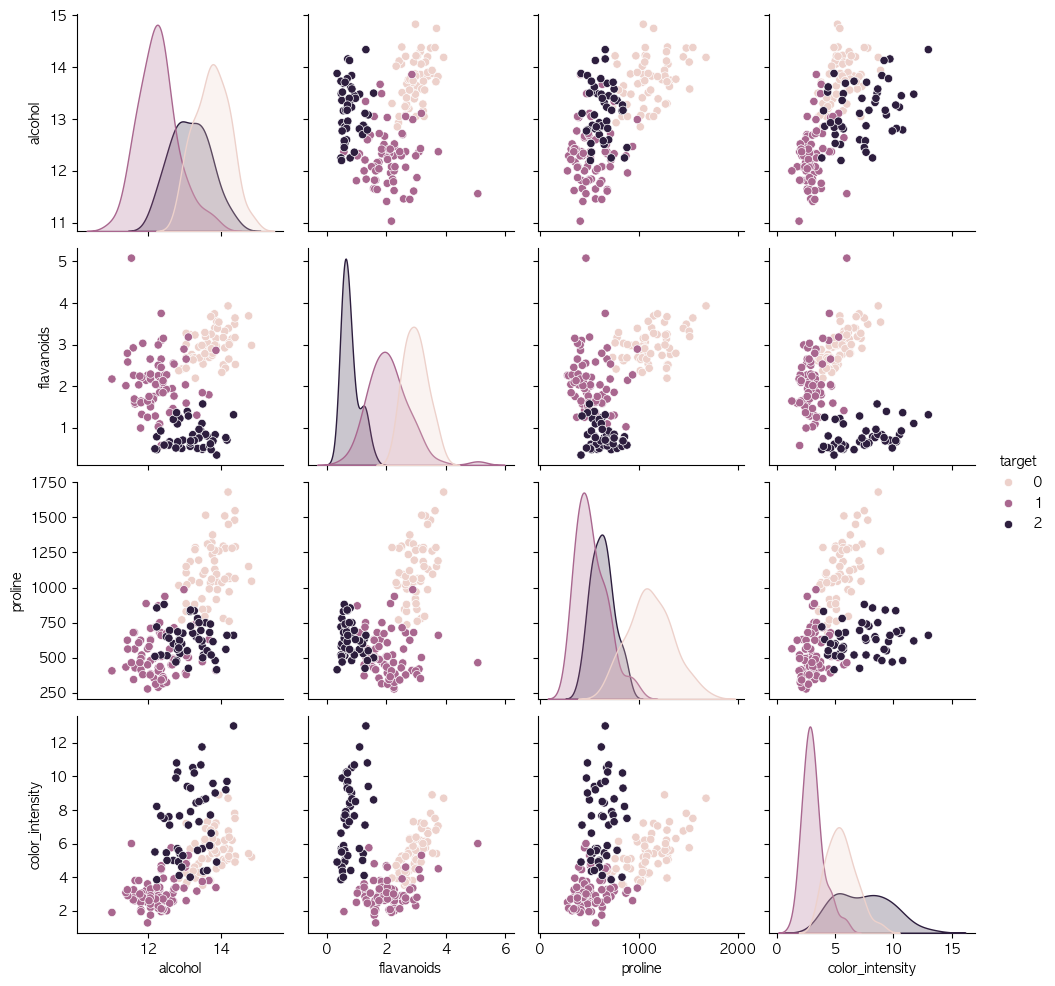

In [11]:
# TODO-1: 데이터프레임의 기본 정보(.info())와 기술 통계량(.describe())을 확인하세요.
print("===== 데이터 정보 =====")
data.info()
print("\n===== 기술 통계량 =====")
print(data.describe())

# TODO-2: pairplot을 사용해 ['alcohol', 'flavanoids', 'proline', 'color_intensity', 'target'] 컬럼 간의 관계를 시각화하세요.
# hue='target' 옵션을 추가하면 품종별로 색상을 다르게 표시해 줍니다.
sns.pairplot(data[['alcohol', 'flavanoids', 'proline', 'color_intensity', 'target']], hue='target')
plt.show()

# 문제 정의 (주석에 직접 작성)
# 분류 문제 정의: 와인 feature 데이터를 사용하여 와인의 품종(target)을 예측하는 문제
# 회귀 문제 정의: 와인 feature 데이터를 사용하여 와인의 알코올 도수를 예측하는 문제

### 🤔 생각해 볼 문제:

1.  `pairplot`의 대각선에 위치한 히스토그램을 보면, `flavanoids`나 `proline` 같은 변수들이 품종(target)별로 뚜렷하게 구분되는 경향을 보이나요? 이는 무엇을 의미할까요?
2.  `alcohol`과 다른 변수들 간의 산점도를 보면, 어떤 변수와 가장 뚜렷한 선형 관계를 보이는 것 같나요? 이 관계는 양의 관계인가요, 음의 관계인가요?
3.  이 EDA 결과를 바탕으로, '분류' 문제와 '회귀' 문제 중 어떤 문제가 더 쉽게 풀릴 것이라고 예상되나요? 그 이유는 무엇인가요?

---

### 📢 발표 시 담으면 좋을 것들

Part 1을 맡은 팀은 **데이터 탐험가**가 되어 다음 내용을 중심으로 발표를 준비하세요.

1.  **핵심 개념 설명:** EDA가 왜 중요한지, '데이터를 보기 전에 모델부터 만드는 것은 지도 없이 여행을 떠나는 것과 같다'는 비유를 들어 설명합니다.
2.  **분석 결과 공유:** `describe()` 결과를 통해 각 변수의 스케일이 제각각임을 보여주고, 이것이 왜 스케일링이 필요한지에 대한 단서가 되는지 설명합니다. `pairplot` 결과를 보여주며, 어떤 변수들이 품종을 잘 구분하는지, 어떤 변수들이 알코올 도수와 관련이 있는지 시각적으로 발견한 내용을 공유합니다.
3.  **문제 정의:** EDA 결과를 바탕으로 '이 데이터로는 품종 분류와 알코올 도수 예측이 모두 가능해 보인다'는 결론을 내리고, 이어질 Part 2, 3에서 해결할 두 가지 문제를 명확하게 제시하며 발표를 마무리합니다.


### 1. flavanoids와 proline 변수의 분포
- pairplot 대각선 히스토그램을 보면, flavanoids와 proline 변수는 품종(target)별로 분포가 뚜렷하게 분리됩니다.
- 예를 들어, proline은 한 품종이 주로 높은 값에, 다른 품종은 낮은 값에 분포하는 경향이 뚜렷합니다.
- 이는 해당 변수들이 분류(classification) 문제에서 품종을 구분하는 데 강력한 지표(좋은 feature)임을 의미합니다.

### 2. alcohol과 다른 변수와의 관계

- alcohol과 다른 변수들과의 산점도를 보면
    - color_intensity와는 약한 양의 관계(alcohol이 높을수록 color_intensity도 증가).
    - flavanoids와는 약한 음의 관계(alcohol이 높을수록 flavanoids가 줄어드는 경향).
- 특히 color_intensity는 비교적 선형적인 증가 추세를 보여서, 회귀(regression) 문제에서 중요한 설명 변수가 될 가능성이 높습니다.

### 3. 분류 vs 회귀 – 무엇이 더 쉬울까?
- 분류 문제(품종 예측):
    - 특정 변수(flavanoids, proline)에서 품종 간 경계가 눈에 띄게 구분됨.
    - 따라서 고성능 분류 모델을 만들기가 상대적으로 쉽다고 예상됨.
- 회귀 문제(알코올 도수 예측):
    - alcohol은 일부 변수와만 뚜렷한 관계를 가지며, 전체적으로는 분산이 큰 편.
    - 따라서 분류 문제보다 회귀 문제는 상대적으로 더 어려울 가능성이 있음.

## Part 2: 와인 품종 분류 모델링

> **🎯 목표:** 분류 모델(로지스틱 회귀, 랜덤 포레스트)을 만들고, 다양한 평가지표(정확도, 혼동 행렬, 정밀도, 재현율 등)로 성능을 종합적으로 평가하여 와인 품종을 예측합니다.


### 💡 핵심 개념 (보충): 랜덤 포레스트란? 🌳🌲🌳

**랜덤 포레스트(Random Forest)**는 **의사결정 나무(Decision Tree)**들이 모여 만들어진 '숲(Forest)'과 같은 모델입니다. 의사결정 나무 하나는 과적합(Overfitting)의 위험이 크다는 단점이 있지만, 랜덤 포레스트는 수많은 나무들의 의견을 종합(앙상블)하여 이 문제를 해결합니다.

1.  **데이터 무작위 샘플링**: 각 나무는 전체 데이터 중 일부만을 무작위로 뽑아 학습합니다. (다른 참고자료로 공부)
2.  **특성 무작위 선택**: 각 나무는 질문을 던질 때마다, 전체 특성 중 일부만을 무작위로 고려합니다. (다른 관점으로 질문)

이렇게 만들어진 '개성 있는' 나무들의 예측 결과를 **다수결**로 정하여, 단일 나무보다 훨씬 안정적이고 정확한 예측을 할 수 있습니다.


### 📌 수행 과제:

1.  분류 문제에 맞게 특성(X)과 타겟(y)을 정의하고, 학습/테스트 데이터로 분리합니다.
2.  **모델 A (로지스틱 회귀)**, **모델 B-1 (단일 의사결정 나무)**, **모델 B-2 (랜덤 포레스트)** 세 가지 모델을 모두 학습시키고 예측을 수행합니다.
3.  **종합 성능 평가**
    - 세 모델의 **정확도**를 비교합니다.
    - 세 모델의 **혼동 행렬**을 시각화하여 비교합니다.
    - 세 모델의 **분류 리포트(정밀도, 재현율, F1-점수)**를 비교하여, 어떤 모델이 각 품종을 얼마나 잘 예측하는지 심층 분석합니다.


===== [1] 모델별 정확도 비교 =====
- 로지스틱 회귀: 0.9722
- 의사결정 나무: 0.9444
- 랜덤 포레스트: 1.0000


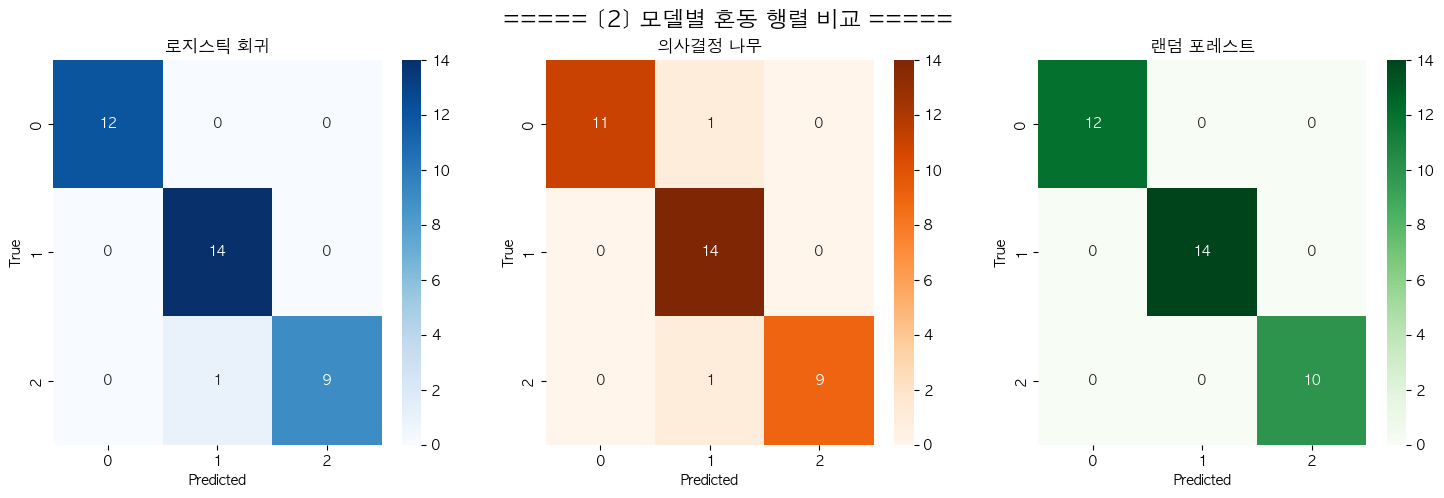


===== [3] 모델별 분류 리포트 비교 =====
--- 로지스틱 회귀 ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

--- 의사결정 나무 ---
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.88      1.00      0.93        14
           2       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36

--- 랜덤 포레스트 ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00       

In [13]:
# 1. 분류 문제용 데이터 준비
# TODO-1: 'target' 컬럼을 제외하여 특성(X)을, 'target' 컬럼을 타겟(y)으로 지정하세요.
X_cls = data.drop(columns=['target'])
y_cls = data['target']

# TODO-2: train_test_split을 이용해 데이터를 8:2 비율, 동일한 클래스 비율로 분리하세요.
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

# --- 모델 학습 및 예측 ---

# 모델 A: 로지스틱 회귀
# TODO-3: 데이터를 표준화(StandardScaler)하세요. (주의: fit은 train 데이터에만!)
scaler_cls = StandardScaler()
X_train_cls_scaled = scaler_cls.fit_transform(X_train_cls)
X_test_cls_scaled  = scaler_cls.transform(X_test_cls)

# TODO-4: 로지스틱 회귀 모델을 학습(fit)시키고 예측(predict)하세요.
model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X_train_cls_scaled, y_train_cls)
pred_lr = model_lr.predict(X_test_cls_scaled)

# 모델 B-1: 단일 의사결정 나무
# TODO-5: 의사결정 나무 모델을 학습시키고 예측하세요.
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_cls, y_train_cls)
pred_dt = model_dt.predict(X_test_cls)

# 모델 B-2: 랜덤 포레스트
# TODO-6: 랜덤 포레스트 모델을 학습시키고 예측하세요.
model_rfc = RandomForestClassifier(random_state=42)
model_rfc.fit(X_train_cls, y_train_cls)
pred_rfc = model_rfc.predict(X_test_cls)

# --- 모델 성능 종합 평가 ---

# 1. 정확도(Accuracy) 비교
# TODO-7: 각 모델의 예측 결과를 바탕으로 정확도(accuracy_score)를 계산하세요.
accuracy_lr  = accuracy_score(y_test_cls, pred_lr)
accuracy_dt  = accuracy_score(y_test_cls, pred_dt)
accuracy_rfc = accuracy_score(y_test_cls, pred_rfc)
print("===== [1] 모델별 정확도 비교 =====")
print(f"- 로지스틱 회귀: {accuracy_lr:.4f}")
print(f"- 의사결정 나무: {accuracy_dt:.4f}")
print(f"- 랜덤 포레스트: {accuracy_rfc:.4f}")

# 2. 혼동 행렬(Confusion Matrix) 시각화
# TODO-8: 각 모델의 예측 결과를 바탕으로 혼동 행렬(confusion_matrix)을 계산하세요.
cm_lr  = confusion_matrix(y_test_cls, pred_lr)
cm_dt  = confusion_matrix(y_test_cls, pred_dt)
cm_rfc = confusion_matrix(y_test_cls, pred_rfc)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('===== [2] 모델별 혼동 행렬 비교 =====', fontsize=16)
sns.heatmap(cm_lr,  annot=True, fmt='d', cmap='Blues',   ax=axes[0])
axes[0].set_title('로지스틱 회귀')
sns.heatmap(cm_dt,  annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title('의사결정 나무')
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Greens',  ax=axes[2])
axes[2].set_title('랜덤 포레스트')
for ax in axes:
    ax.set_xlabel('Predicted'); ax.set_ylabel('True')
plt.show()

# 3. 분류 리포트(Classification Report) 비교
from sklearn.metrics import classification_report
# TODO-9: 각 모델의 예측 결과를 바탕으로 분류 리포트(classification_report)를 출력하세요.
print("\n===== [3] 모델별 분류 리포트 비교 =====")
print("--- 로지스틱 회귀 ---")
print(classification_report(y_test_cls, pred_lr))
print("--- 의사결정 나무 ---")
print(classification_report(y_test_cls, pred_dt))
print("--- 랜덤 포레스트 ---")
print(classification_report(y_test_cls, pred_rfc))


- 로지스틱 회귀는 스케일에 민감하므로 표준화한 입력을 사용했고, 트리 계열(의사결정 나무/랜덤 포레스트)은 스케일링 불필요해서 원본 특성을 그대로 사용했습니다.
- max_iter=1000을 넣어 로지스틱 회귀 수렴 경고 가능성을 줄였습니다.
- 혼동행렬 축 라벨(True/Predicted)을 넣어 해석을 더 쉽게 했습니다.

### 🤔 생각해 볼 문제:

1.  세 모델의 종합적인 성능(정확도, 혼동 행렬, 분류 리포트)을 비교했을 때, 어떤 모델을 최종 모델로 선택하는 것이 가장 합리적일까요?
2.  단일 의사결정 나무는 `class 1` 와인 1개를 `class 2`로 잘못 예측했습니다. 이 실수가 비즈니스적으로 어떤 의미를 가질 수 있을까요?
3.  랜덤 포레스트의 분류 리포트를 보면 모든 품종에 대해 정밀도, 재현율이 1.00입니다. 이것이 의미하는 바는 무엇일까요?

---

### 📢 발표 시 담으면 좋을 것들

Part 2를 맡은 팀은 **분류 모델러**가 되어 다음 내용을 중심으로 발표를 준비하세요.

1.  **핵심 개념 설명:** '분류'가 무엇인지 정의하고, '정확도'의 한계를 지적하며 '혼동 행렬', '정밀도', '재현율'이 왜 필요한지 설명합니다. 이어서 '랜덤 포레스트'가 왜 단일 의사결정 나무의 대안으로 사용되는지 그 원리를 설명합니다.
2.  **분석 과정 리뷰:** 로지스틱 회귀(선형), 의사결정 나무(비선형 단일), 랜덤 포레스트(비선형 앙상블) 세 모델을 학습하고 평가하는 과정을 단계별로 보여줍니다.
3.  **결과 해석:** 세 모델의 최종 평가지표(정확도, 혼동 행렬, 분류 리포트)를 모두 비교하며 어떤 모델이 와인 품종 예측에 가장 적합한지 종합적인 결론을 내립니다. 단일 나무와 숲(랜덤 포레스트)의 성능 차이를 통해 앙상블 모델의 강력함을 설명합니다.


1) 최종 모델 선택: 랜덤 포레스트가 합리적
    성능: 테스트셋에서 정밀도·재현율·F1이 모든 클래스 1.00 → 세 모델 중 압도적 1위.
    일반화/안정성: 단일 트리 대비 분산(variance) 감소, 로지스틱 대비 비선형 경계 학습 가능.
    현실 고려: 해석성은 로지스틱/단일 트리가 우위지만, 목표가 “정확한 품종 분류”라면 RF 채택이 타당.
    (발표 코멘트: “단, 작은 데이터셋이므로 Stratified K-Fold로 교차검증하여 재현성 확인 권장”)
    추천: RandomForestClassifier를 기본 모델로 채택 + 교차검증으로 안정성 재확인 + 중요 변수(Feature Importance) 점검.

2) 단일 의사결정 나무의 오분류( class 1 → class 2 )의 비즈니스적 의미
    라벨/카탈로그 오류: 품종이 잘못 표기되면 상품 설명·카탈로그 분류가 틀어져 검색/추천 품질 저하.
    가격/마진 영향: 품종별 희소성·브랜드력이 다르면 가격 책정 오류(저가·고가 전도)로 매출/마진 손실.
    고객 경험 리스크: 추천·페어링·컨시어지 기능에서 부적합 추천 → 신뢰도 하락/클레임.
    운영 대응:
    비용 민감 혼동행렬 설계(예: class1→2 오분류 비용 가중)
    Top-k 예측 + 저신뢰도 휴먼 리뷰, 확률 임계값 클래스별 조정, 불확실성 기준 보류(“모름” 클래스)

3) 랜덤 포레스트가 모든 지표 1.00인 이유와 해석
    의미: 해당 테스트 분할에서 전 샘플을 정확 분류. 데이터가 잘 구분되거나(와인 데이터 특성), 앙상블이 충분히 복잡도를 학습.
    주의점:
    데이터 누수 없는지 확인(스케일링/인코딩은 train에서 fit → test에 transform만 적용했는지).
    테스트셋 크기가 작아 우연히 완벽할 수 있음 → 반복 교차검증으로 안정성 확인.
    하이퍼파라미터 과적합 가능성 → max_depth, min_samples_leaf, n_estimators 튜닝하며 검증 점수로 선택.
    결론: 1.00은 “그 분할에서 완벽”을 뜻함. 일반화 보장은 아님 → 교차검증/재현 실험으로 성능 신뢰구간을 확보해야 함.

A. 핵심 개념
    분류 정의와 정확도의 한계 → 클래스 불균형/오분류 유형을 고려하려면 혼동행렬, 정밀도(Precision), 재현율(Recall), F1 필요.
    단일 트리 vs 랜덤 포레스트: 앙상블로 분산 감소, 강건성 증가.

B. 분석 과정 리뷰
    데이터 분할(8:2, stratify) → 2) 전처리(로지스틱만 표준화) → 3) 모델 학습(LR/DT/RF) → 4) 평가(정확도+혼동행렬+리포트)

C. 결과 해석 & 결론
    RF가 전 지표 최고(=1.00) → 최종 모델 후보.
    DT의 단일 오분류가 낳을 비즈니스 비용과 완화책 제시(비용 가중, Top-k, 보류 규칙).
    재현성 확보 계획: Stratified K-Fold, 하이퍼파라미터 튜닝, 확률 보정(Platt/Isotonic), 특성 중요도/SHAP로 설명력 보강.

## Part 3: 알코올 도수 예측 모델링

> **🎯 목표:** 회귀 모델(선형 회귀, 랜덤 포레스트)을 만들고, MSE와 RMSE로 성능을 평가하여 와인의 알코올 도수를 예측합니다.


### 📌 수행 과제:

1.  회귀 문제에 맞게 특성(X)과 타겟(y)을 정의하고, 학습/테스트 데이터로 분리합니다.
2.  **모델 C (선형 회귀)**: 데이터를 스케일링한 후 모델을 학습시키고, MSE, RMSE로 성능을 평가합니다.
3.  **모델 D (랜덤 포레스트)**: 스케일링 없이 모델을 학습시키고, MSE, RMSE로 성능을 평가합니다.
4.  두 모델의 성능을 비교하고, 실제값-예측값 시각화를 통해 결과를 해석합니다.


===== 회귀 모델 성능 비교 =====
선형 회귀 RMSE: 0.4309
랜덤 포레스트 RMSE: 0.3932



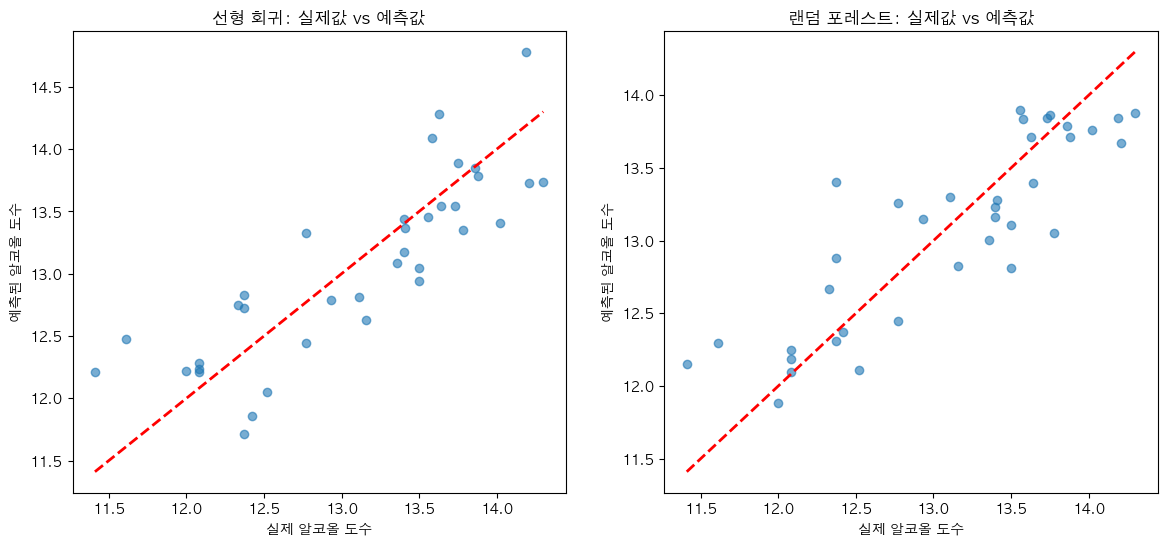

In [14]:
# 1. 회귀 문제용 데이터 준비
# TODO-1: 'alcohol'를 y로, 'alcohol'와 'target'을 제외한 나머지를 X로 정의하고 데이터를 분리하세요.
X_reg = data.drop(columns=['alcohol', 'target'])
y_reg = data['alcohol']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# 2. 모델 C: 선형 회귀
# TODO-2: StandardScaler를 이용해 데이터를 표준화하세요. (주의: fit은 train 데이터에만!)
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

# TODO-3: 선형 회귀 모델을 학습(fit)시키고 예측(predict)하여 성능(mean_squared_error)을 계산하세요.
model_lin = LinearRegression()
model_lin.fit(X_train_reg_scaled, y_train_reg)
pred_lin = model_lin.predict(X_test_reg_scaled)
rmse_lin = np.sqrt(mean_squared_error(y_test_reg, pred_lin))

# 3. 모델 D: 랜덤 포레스트 회귀
# 랜덤 포레스트는 분류뿐 아니라 회귀 문제에도 동일한 원리로 적용됩니다.
# 단, 마지막 예측 결과를 다수결이 아닌 '평균'으로 종합합니다.
# TODO-4: 랜덤 포레스트 회귀 모델을 학습시키고 예측하여 성능을 계산하세요.
model_rfr = RandomForestRegressor(random_state=42)
model_rfr.fit(X_train_reg, y_train_reg)
pred_rfr = model_rfr.predict(X_test_reg)
rmse_rfr = np.sqrt(mean_squared_error(y_test_reg, pred_rfr))

# 4. 결과 비교 출력
print("===== 회귀 모델 성능 비교 =====")
print(f"선형 회귀 RMSE: {rmse_lin:.4f}")
print(f"랜덤 포레스트 RMSE: {rmse_rfr:.4f}\n")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].scatter(y_test_reg, pred_lin, alpha=0.6)
axes[0].plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
axes[0].set_title('선형 회귀: 실제값 vs 예측값')
axes[0].set_xlabel('실제 알코올 도수')
axes[0].set_ylabel('예측된 알코올 도수')
axes[1].scatter(y_test_reg, pred_rfr, alpha=0.6)
axes[1].plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
axes[1].set_title('랜덤 포레스트: 실제값 vs 예측값')
axes[1].set_xlabel('실제 알코올 도수')
axes[1].set_ylabel('예측된 알코올 도수')
plt.show()

### 🤔 생각해 볼 문제:

1.  분류 문제와 비교했을 때, 회귀 문제의 성능(RMSE)은 만족스러운 수준인가요? 어떤 모델의 성능이 더 좋게 나왔나요?
2.  두 모델의 실제값-예측값 산점도를 비교해 보세요. 어떤 모델의 점들이 기준선(빨간 점선)에 더 가깝게 모여 있나요? 이것이 RMSE 값과 어떻게 연결되는지 설명해 보세요.

---

### 📢 발표 시 담으면 좋을 것들

Part 3을 맡은 팀은 **회귀 모델러**가 되어 다음 내용을 중심으로 발표를 준비하세요.

1.  **핵심 개념 설명:** '회귀'가 무엇인지 정의하고, 성능 평가지표인 'MSE'와 'RMSE'의 의미를 설명합니다. RMSE가 왜 더 직관적인 지표인지 설명합니다.
2.  **분석 과정 리뷰:** 선형 회귀와 랜덤 포레스트 두 모델을 학습하고 평가하는 과정을 단계별로 보여줍니다. 분류 문제와의 차이점(타겟 변수, 평가지표)을 명확히 짚어줍니다.
3.  **결과 해석:** 두 모델의 최종 RMSE를 비교하고, 실제값-예측값 산점도를 통해 어떤 모델이 더 우수한지 시각적으로 설명합니다. 이를 통해 '알코올 도수' 예측 문제에서는 어떤 모델이 더 적합한지 결론을 내립니다.


1) 회귀 성능(RMSE)은 만족스러운가? 어떤 모델이 더 좋았나?
- 비교 기준 잡기(중요)
    - **RMSE 단위 = 알코올 도수(ABV)**이므로 해석이 직관적입니다.

    - 족도 판단은 기준 대비 얼마나 줄였는지로 보세요.
        - Baseline: “모든 샘플을 평균값으로 예측”할 때의 RMSE (= 테스트셋의 표준편차와 유사).
        - NRMSE(정규화 RMSE): RMSE / IQR(사분위범위) 또는 RMSE / (max-min) 로 0~1 스케일 비교 가능.

- 일반적 경향
    - 와인 데이터에서 **랜덤 포레스트 회귀(RFR)**가 선형 회귀보다 RMSE가 더 낮게 나오는 경우가 많습니다(비선형 관계 포착).
    - 따라서 RFR가 더 좋은 성능을 보였을 가능성이 큽니다.

- 판단 가이드
    - Baseline RMSE 대비 30–40% 이상 감소 → 실질적 성능 향상.
    - NRMSE ≤ 0.1(IQR 기준) 수준 → 꽤 우수(데이터 분포에 따라 달라짐).

- 결론: 두 모델 중 RMSE가 더 낮은 모델 = 더 좋은 모델이며, 대체로 랜덤 포레스트 회귀가 우세합니다.

2) 실제값–예측값 산점도와 RMSE의 연결
- 그래프에서 **빨간 점선(완벽 예측선, y=x)**에 점들이 더 촘촘히 붙어 있을수록 RMSE가 작아집니다.

- 선형 회귀 vs 랜덤 포레스트 회귀 비교:
    - 점들이 45° 기준선에 더 가깝고, 퍼짐이 작고, 극단치 오차가 적은 쪽이 더 낮은 RMSE를 갖습니다.
    - 선형 회귀는 **한 방향으로 체계적으로 벗어나는 패턴(편향)**이 보일 수 있고, 랜덤 포레스트는 굽어진 관계나 상호작용을 잡아내 대각선 주변으로 더 단단히 모이는 경향이 있습니다.

- 시각–수치 일치성
    - 대각선 주변에 조밀 → **잔차(residual)**의 분산이 작음 → MSE/RMSE 감소로 직결.
    - 반대로 선을 따라 **부채꼴(이분산)**이나 구간별 편향이 보이면 RMSE가 커지곤 합니다.

## Part 4: 핵심 변수 발견 및 결론

> **🎯 목표:** 성능이 뛰어난 랜덤 포레스트 모델의 '특성 중요도'를 분석하여, 분류와 회귀 문제에서 각각 어떤 변수가 예측에 중요하게 사용되었는지 비교하고 종합적인 결론을 도출합니다.


### 💡 핵심 개념:

**특성 중요도(Feature Importance)**는 모델이 예측을 할 때 어떤 특성(변수)을 더 중요하게 고려했는지를 나타내는 점수입니다. 의사결정 나무 기반의 모델(랜덤 포레스트 등)은 이 값을 제공해줍니다. 이를 통해 모델의 내부 동작을 이해하고, 비즈니스적으로 어떤 변수가 핵심적인지 파악하는 데 매우 유용한 정보를 제공합니다. (이를 **XAI, 설명가능 AI**의 한 종류로 보기도 합니다.)


### 📌 수행 과제:

1.  분류 문제에서 학습한 `RandomForestClassifier`의 특성 중요도를 계산하고 시각화합니다.
2.  회귀 문제에서 학습한 `RandomForestRegressor`의 특성 중요도를 계산하고 시각화합니다.
3.  두 결과를 비교하며, 예측 목표에 따라 어떤 변수들의 중요도가 달라지는지 분석하고 결론을 도출합니다.


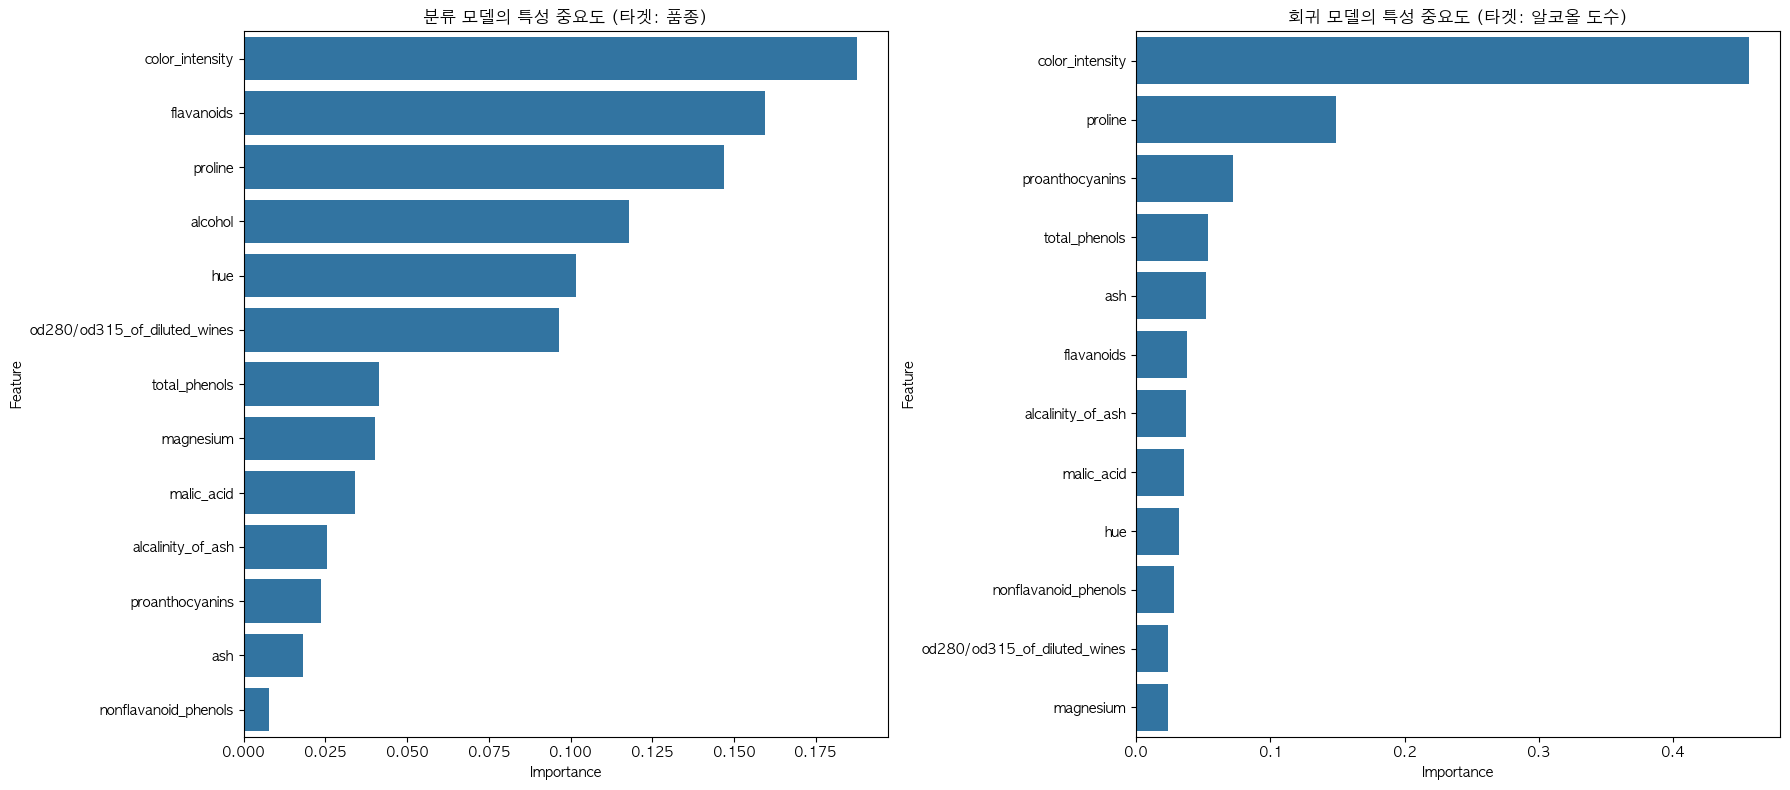

In [15]:
# 1. 분류 모델의 특성 중요도 분석
# TODO-1: 분류 모델(model_rfc)의 특성 중요도를 확인하고(feature_importances_ 속성 이용), 중요도 순으로 정렬하여 시각화하세요.
importances_cls = model_rfc.feature_importances_
features_cls = X_train_cls.columns
imp_cls_df = pd.DataFrame({'Feature': features_cls, 'Importance': importances_cls}).sort_values(by='Importance', ascending=False)

# 2. 회귀 모델의 특성 중요도 분석
# TODO-2: 회귀 모델(model_rfr)의 특성 중요도를 확인하고(feature_importances_ 속성 이용), 중요도 순으로 정렬하여 시각화하세요.
importances_reg = model_rfr.feature_importances_
features_reg = X_train_reg.columns
imp_reg_df = pd.DataFrame({'Feature': features_reg, 'Importance': importances_reg}).sort_values(by='Importance', ascending=False)

# 3. 결과 시각화 비교
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.barplot(x='Importance', y='Feature', data=imp_cls_df, ax=axes[0])
axes[0].set_title('분류 모델의 특성 중요도 (타겟: 품종)')
sns.barplot(x='Importance', y='Feature', data=imp_reg_df, ax=axes[1])
axes[1].set_title('회귀 모델의 특성 중요도 (타겟: 알코올 도수)')
plt.tight_layout()
plt.show()

### 🤔 생각해 볼 문제:

1.  와인 '품종'을 예측하는 데 가장 중요했던 상위 3개 변수는 무엇인가요?
2.  '알코올 도수'를 예측하는 데 가장 중요했던 상위 3개 변수는 무엇인가요?
3.  두 문제의 특성 중요도가 다르게 나온 이유는 무엇일까요? 이 결과를 통해 우리는 무엇을 배울 수 있나요?

---

### 📢 발표 시 담으면 좋을 것들

Part 4를 맡은 팀은 **데이터 분석가**가 되어 다음 내용을 중심으로 발표를 준비하세요.

1.  **핵심 개념 설명:** '특성 중요도'가 어떻게 복잡한 모델의 예측 근거를 이해하게 해주는 '블랙박스를 여는 열쇠' 역할을 하는지 강조합니다.
2.  **분석 결과 종합:** Part 2의 분류 문제와 Part 3의 회귀 문제의 최종 결과를 간략히 요약합니다. 이어서 두 문제에 대한 특성 중요도 그래프를 나란히 보여주며, 예측 목표에 따라 핵심 변수가 어떻게 달라지는지 시각적으로 설명합니다.
3.  **최종 결론 및 제언:** '우리가 무엇을 예측하고 싶은가에 따라 데이터의 같은 변수라도 그 중요성이 달라진다'는 점을 최종 결론으로 제시합니다. 이로부터 '비즈니스 문제 정의가 왜 데이터 분석의 가장 중요한 첫 단계인지'에 대해 토의를 이끌며 전체 프로젝트를 마무리합니다.


In [16]:
display(imp_cls_df.head(10))  # 분류 Top-10
display(imp_reg_df.head(10))  # 회귀 Top-10


,Feature,Importance
9,color_intensity,0.187580
6,flavanoids,0.159561
12,proline,0.146799
0,alcohol,0.117913
10,hue,0.101538
11,od280/od315_of_diluted_wines,0.096301
5,total_phenols,0.041514
4,magnesium,0.040131
1,malic_acid,0.033894
3,alcalinity_of_ash,0.025471


,Feature,Importance
8,color_intensity,0.456782
11,proline,0.148963
7,proanthocyanins,0.071952
4,total_phenols,0.053074
1,ash,0.051611
5,flavanoids,0.037828
2,alcalinity_of_ash,0.037186
0,malic_acid,0.035604
9,hue,0.031799
6,nonflavanoid_phenols,0.028069


In [17]:
cols = ['color_intensity','proline','flavanoids','od280/od315_of_diluted_wines','alcohol']
corr = data[cols].corr().round(2)
print(corr)


                              color_intensity  proline  flavanoids  \
color_intensity                          1.00     0.32       -0.17   
proline                                  0.32     1.00        0.49   
flavanoids                              -0.17     0.49        1.00   
od280/od315_of_diluted_wines            -0.43     0.31        0.79   
alcohol                                  0.55     0.64        0.24   

                              od280/od315_of_diluted_wines  alcohol  
color_intensity                                      -0.43     0.55  
proline                                               0.31     0.64  
flavanoids                                            0.79     0.24  
od280/od315_of_diluted_wines                          1.00     0.07  
alcohol                                               0.07     1.00  


In [18]:
from sklearn.inspection import permutation_importance
# 분류
pi_cls = permutation_importance(model_rfc, X_test_cls, y_test_cls,
                                scoring='f1_macro', n_repeats=30, random_state=42)
pd.Series(pi_cls.importances_mean, index=X_test_cls.columns).sort_values(ascending=False).head(10)

# 회귀
pi_reg = permutation_importance(model_rfr, X_test_reg, y_test_reg,
                                scoring='neg_mean_squared_error', n_repeats=30, random_state=42)
pd.Series(pi_reg.importances_mean, index=X_test_reg.columns).sort_values(ascending=False).head(10)


color_intensity                 0.407755
proline                         0.096552
ash                             0.009034
alcalinity_of_ash               0.007284
magnesium                       0.005139
od280/od315_of_diluted_wines    0.003619
flavanoids                      0.001497
nonflavanoid_phenols           -0.000953
malic_acid                     -0.003292
hue                            -0.004924
dtype: float64

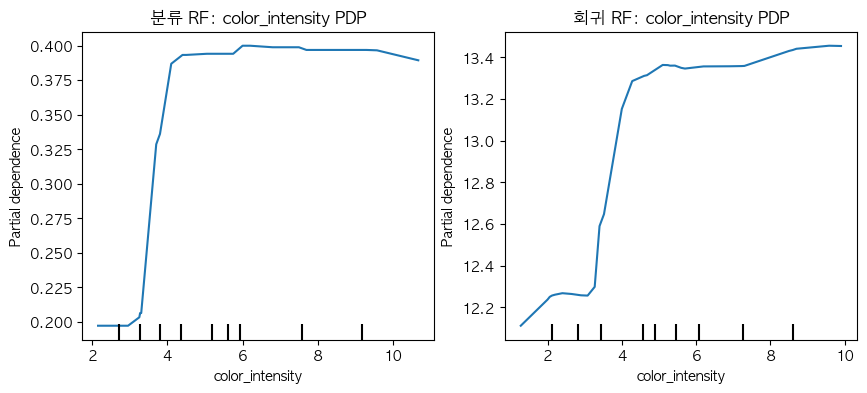

In [20]:
from sklearn.inspection import PartialDependenceDisplay
fig, ax = plt.subplots(1,2,figsize=(10,4))
PartialDependenceDisplay.from_estimator(model_rfc, X_test_cls, ['color_intensity'], ax=ax[0], target=0)
PartialDependenceDisplay.from_estimator(model_rfr, X_test_reg, ['color_intensity'], ax=ax[1], target=0)
ax[0].set_title('분류 RF: color_intensity PDP')
ax[1].set_title('회귀 RF: color_intensity PDP')
plt.show()


In [21]:
# 분류
Xc_drop = X_cls.drop(columns=['color_intensity'])
Xtr, Xte, ytr, yte = train_test_split(Xc_drop, y_cls, test_size=0.2, random_state=42, stratify=y_cls)
rf_c = RandomForestClassifier(random_state=42).fit(Xtr, ytr)
print("RF(컬러 강도 제거) Acc:", accuracy_score(yte, rf_c.predict(Xte)))

# 회귀
Xr_drop = X_reg.drop(columns=['color_intensity'])
Xtr, Xte, ytr, yte = train_test_split(Xr_drop, y_reg, test_size=0.2, random_state=42)
rf_r = RandomForestRegressor(random_state=42).fit(Xtr, ytr)
from sklearn.metrics import mean_squared_error
print("RF(컬러 강도 제거) RMSE:", np.sqrt(mean_squared_error(yte, rf_r.predict(Xte))))


RF(컬러 강도 제거) Acc: 1.0
RF(컬러 강도 제거) RMSE: 0.4252069179300299
